# **Data analisys and prediction**

### Features:

| **Column** | **Description**                                           |
| ---------- | --------------------------------------------------------- |
| Survived   | person survived the titanic tragedy (0 - "NO", 1- "YES" ) |
| Sex        | the gender (female, male)                                 |
| Name       | the name                                                  |
| Age        | Age in years                                              |
| SibSp      | # of siblings/wife or husband on board                    |
| Parch      | # of parents / children on board                          |
| Pclass     | The ticket class (1 = "1st", 2 = "2nd", 3 = "3rd")        |

## Libraries to use:

In [184]:
# %pip install pandas numpy seaborn pathlib matplotlib sklearn

In [185]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt


In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [187]:
file_path = Path("titanic.csv")
df_passengers = pd.read_csv(file_path)
df_passengers.head()

,Survived,Sex,Name,Age,SibSp,Parch,Pclass
0,1,male,"Anderson, Mr. Harry",48.0,0,0,1
1,1,female,"Andrews, Miss. Kornelia Theodosia",63.0,1,0,1
2,1,male,"Barkworth, Mr. Algernon Henry Wilson",80.0,0,0,1
3,0,male,"Baumann, Mr. John D",60.0,0,0,1
4,1,female,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,1


In [188]:
df_passengers.info()

<class 'pandas.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  800 non-null    int64  
 1   Sex       800 non-null    object 
 2   Name      800 non-null    object 
 3   Age       800 non-null    float64
 4   SibSp     800 non-null    int64  
 5   Parch     800 non-null    int64  
 6   Pclass    800 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 43.9+ KB


## Exploratory data analysis (EDA)

### Single variable analysis

In [189]:
def show_pie_graph_of_a_variable(df_passengers, variable):
 grouping_by_variable=df_passengers.groupby([variable], observed=True)
 grouping_by_variable.size().plot.pie(y=variable,figsize=(5,5),autopct='%.2f%%')

In [190]:
def show_bar_chart_of_a_variable(df_passengers,variable):
 grouping_by_variable=df_passengers.groupby([variable], observed=True)
 grouping_by_variable.size().plot.bar(y=variable,figsize=(5,5))

- Variable: Age.

Will there be outliers in age?

<Axes: title={'center': "Box plot of the variable 'Age'"}>

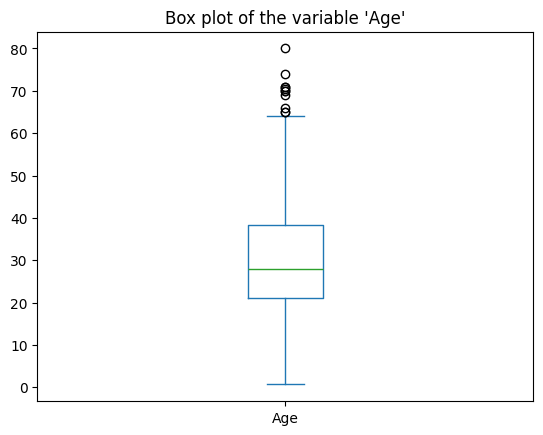

In [191]:
df_passengers["Age"].plot.box(title="Box plot of the variable 'Age'")

As seen in the graph, we see that the outliers are not erroneous data that cannot occur in reality.

And what will be the minimum age, it seems that it tends to zero?

In [192]:
df_passengers["Age"].min()

0.67

The minimum age is 0.67 years, that is, a baby of approximately 8 months.

- Variable: Sex/Gender.

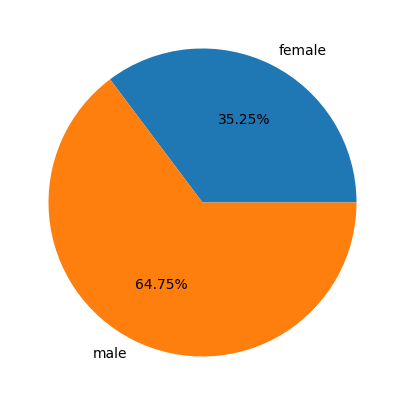

In [193]:
show_pie_graph_of_a_variable(df_passengers,"Sex")

As seen in the graph, there are more men than women, such that the number of women is approximately half the number of men. That is, there are twice as many men as women.

- Variable: Survivors

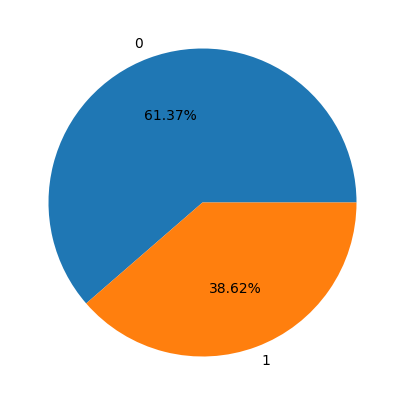

In [194]:
show_pie_graph_of_a_variable(df_passengers,"Survived")

The graph shows that there are a greater number of deaths than survivors, which is logical since very few people manage to survive a tragedy like the one that occurred with the Titanic.

- Variable: Class of the ticket

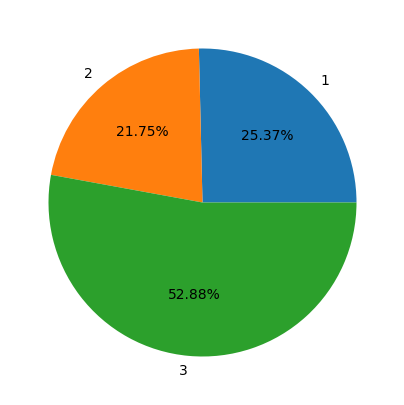

In [195]:
show_pie_graph_of_a_variable(df_passengers,"Pclass")

Looking at the graph, it stands out that there is a large number of passengers who were in third class, which is logical, because it is the most accessible.

- Variable: SibSp

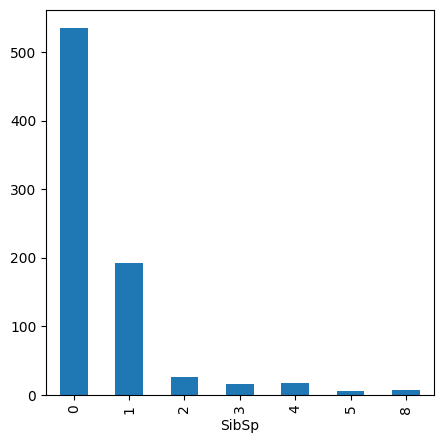

In [196]:
show_bar_chart_of_a_variable(df_passengers,"SibSp")

We observe a greater frequency of people traveling without the company of brothers or wifes

- Variable: Parch

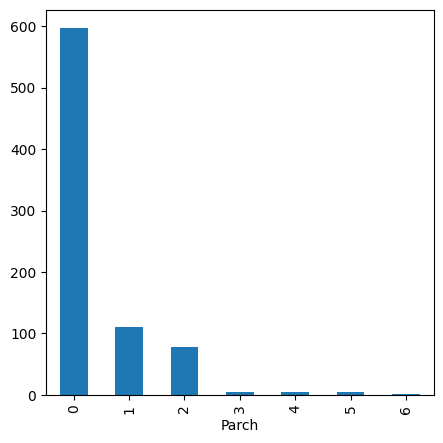

In [197]:
show_bar_chart_of_a_variable(df_passengers,"Parch")

We observe a greater frequency of people traveling without children or parents.

### Analysis of combined variables.

In [198]:
def show_stacked_bar_chart(df, variables):
 grouping_by_variables=pd.crosstab(df[variables[0]], df[variables[1]],normalize='index')*100
 ax = grouping_by_variables.plot.bar(stacked=True, rot=0)
 for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
  bar.get_height() / 2 + bar.get_y(),
  f"{round(bar.get_height(),2)}%", ha = 'center',
  color = 'w', weight = 'bold', size = 8)
 plt.title(" and ".join(variables))
 plt.show()

In [199]:
def show_stacked_bar_chart_without_overlap(df, variables):
 grouping_by_variables=pd.crosstab(df[variables[0]], df[variables[1]])
 grouping_by_variables.plot.bar(stacked=False,rot=0)
 plt.title(" and ".join(variables))
 plt.legend()
 plt.show()

- Variables: type of ticket vs. survived

Will there be a relationship between the class of the passenger and whether or not the passenger survived?

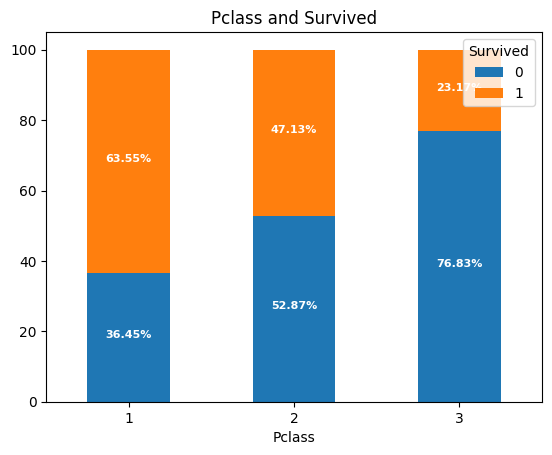

In [200]:
show_stacked_bar_chart(df_passengers,["Pclass","Survived"])

It is illustrated that more people in first class survived, while in third class there were many deaths. Passage class is related to survival.

- Variables: Survival vs age

Text(0.5, 1.0, 'Age and Survived')

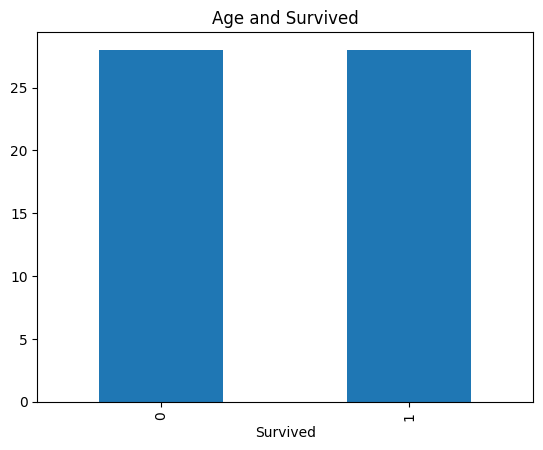

In [201]:
df_passengers.groupby(['Survived'])['Age'].median().plot(kind='bar')
plt.title("Age and Survived")

<Axes: title={'center': 'Age'}, xlabel='Survived'>

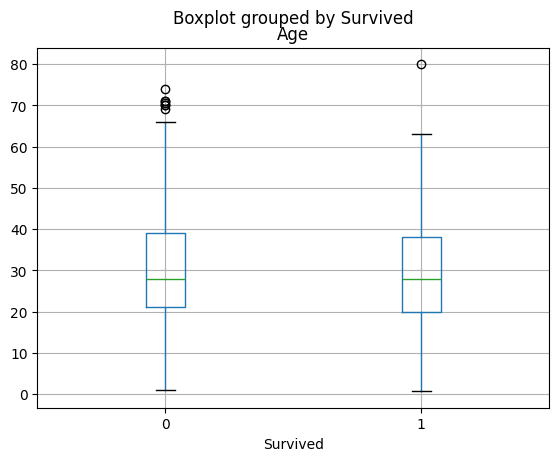

In [202]:
df_passengers.boxplot('Age','Survived')

We observed that people who survived have similar characteristics to those who did not survive. Furthermore, it is observed that the median ages are relatively the same. We conclude that there is no relationship between age and survival.

- Variables: Survival vs Gender

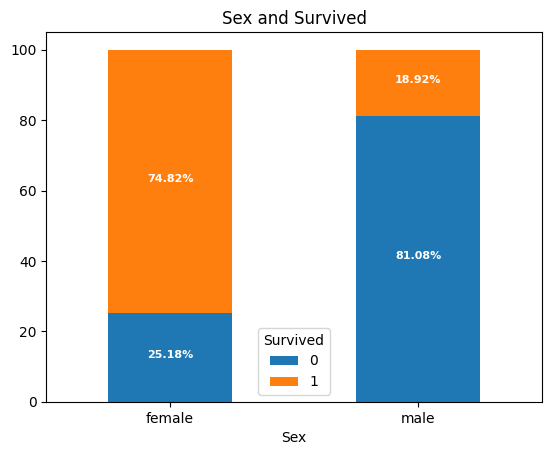

In [203]:
show_stacked_bar_chart(df_passengers,["Sex","Survived"])

Based on the graph, it is concluded that women on the Titanic survived in a greater proportion and men in a lower proportion. Therefore, there is a relationship between survival and gender.

- Variables: Survived vs. # of siblings/wife on the Titanic.

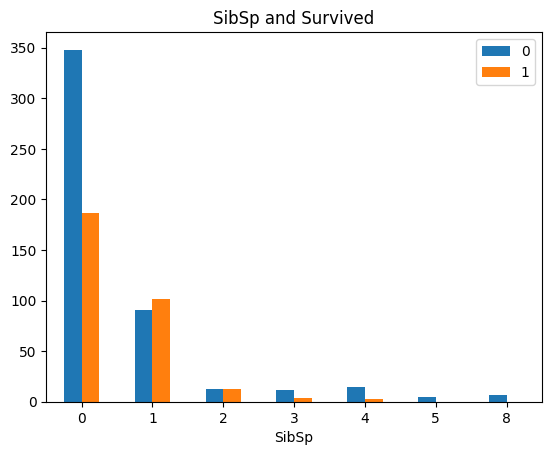

In [204]:
show_stacked_bar_chart_without_overlap(df_passengers,["SibSp","Survived"])

We see in the graph that if we are not accompanied by our brothers or wife, our probability of surviving decreases. Therefore, the number of brothers or wives who were on the Titanic is related to survival.

- Variables: Survived vs. # of parents/children on the Titanic.

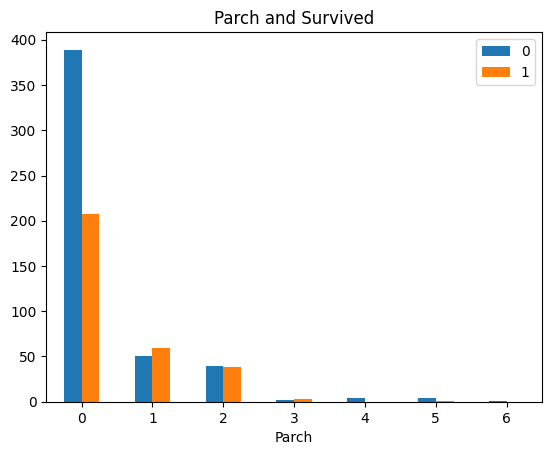

In [205]:
show_stacked_bar_chart_without_overlap(df_passengers,["Parch","Survived"])

We see in the graph that if we are not accompanied by our children or parents, our probability of surviving decreases. Therefore, the number of children or parents who were on the Titanic is related to survival.

- Variables: Parch vs SibSp

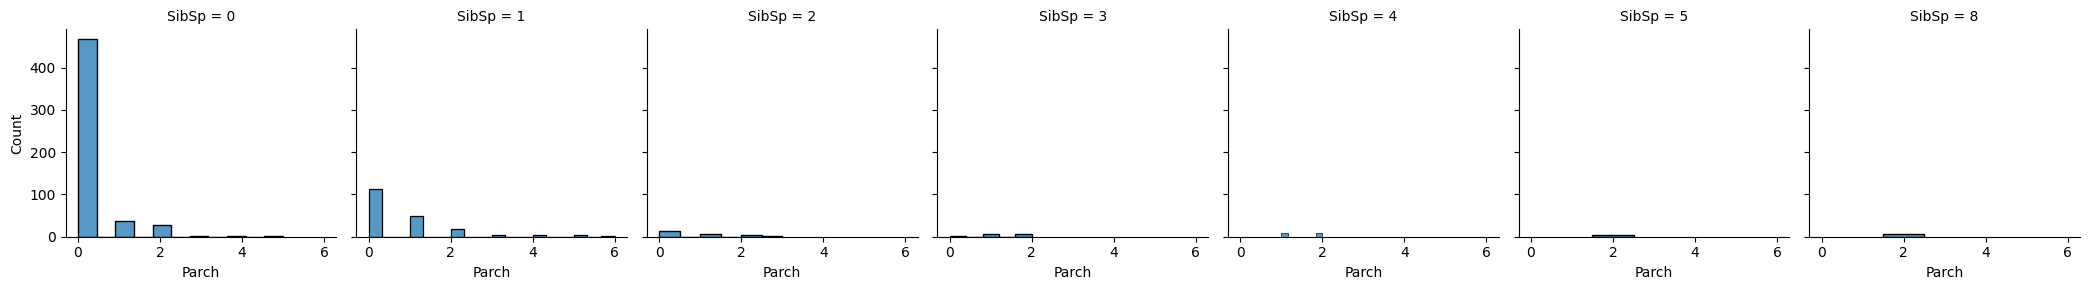

In [206]:
g = sns.FacetGrid(df_passengers, col="SibSp")
g.map(sns.histplot, "Parch")

We can observe that if the # of child/parents is 0, it is most likely that he came alone, that is, he did not come with his brothers or sisters. Taking this into account, there is a relationship between the #of children/parents and the #of siblings/wife.

## Feature engeering

In [207]:
df_passengers["Name"].head()

0                                 Anderson, Mr. Harry
1                   Andrews, Miss. Kornelia Theodosia
2                Barkworth, Mr. Algernon Henry Wilson
3                                 Baumann, Mr. John D
4    Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Name: Name, dtype: object

### Is taken from the abbreviation of the person's title (Mr. Miss. Mrs. Dr.)

Abbreviation titles:

- Mr: Mister
- Miss: Miss
- Mrs: Mistress (pronounced "Missis")
- Master: Master
- Dr: Doctor
- Rev: Reverend
- Major: Major
- Mlle: Mademoiselle (miss in French)
- Mme: Madame (pronounced "Madam")
- Capt: Captain
- Sir: Sir
- Lady: Lady
- Jonkheer: Jonkheer (noble title in the Netherlands)
- Countess: Countess

Mr: Abbreviation of "Mister". It is used as a courtesy title for men, regardless of their marital status.

Miss: Used to refer to a young or single woman.

Mrs: Abbreviation of "Mistress" (pronounced "Missis"). It is used as a title for a married or widowed woman.

Master: Used as a title for children or minors. It can also be used to denote a level of mastery or mastery in a skill.

In [208]:
def get_title_abbreviation(name):
 return re.findall("(\w+)\.",name)[0]

In [209]:
df_passengers["TitleAbreviation"]=df_passengers["Name"].apply(get_title_abbreviation)

In [210]:
df_passengers["TitleAbreviation"].value_counts()

TitleAbreviation
Mr          464
Miss        163
Mrs         113
Master       36
Dr            7
Rev           6
Major         2
Mlle          2
Mme           1
Capt          1
Sir           1
Lady          1
Jonkheer      1
Countess      1
Col           1
Name: count, dtype: int64

In [211]:
otras_abreviaciones=['Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
df_passengers["TitleAbreviation"]=df_passengers["TitleAbreviation"].replace(["Mlle","Lady"],"Miss")
df_passengers["TitleAbreviation"]=df_passengers["TitleAbreviation"].replace("Mme","Mrs")
df_passengers["TitleAbreviation"]=df_passengers["TitleAbreviation"].replace(otras_abreviaciones,"Other")



In [212]:
df_passengers["TitleAbreviation"].value_counts()

TitleAbreviation
Mr        464
Miss      166
Mrs       114
Master     36
Other      20
Name: count, dtype: int64

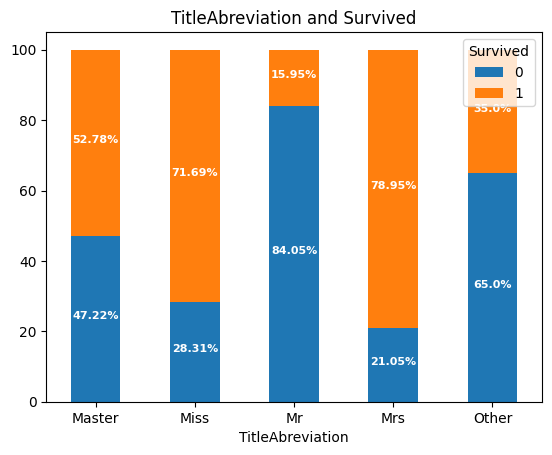

In [213]:
show_stacked_bar_chart(df_passengers,["TitleAbreviation","Survived"])

We observed that more men with the title (Mr.) died compared to single women (Miss, Mrs) who had better survival.

### A variable is added that combines the #number of children/parents and #of siblings/spouse in relation to survival.

In [214]:
df_passengers["came_alone"]=df_passengers.apply(lambda row:( 
                                                    row["SibSp"]*row["Parch"])==0,axis="columns"
                                              )

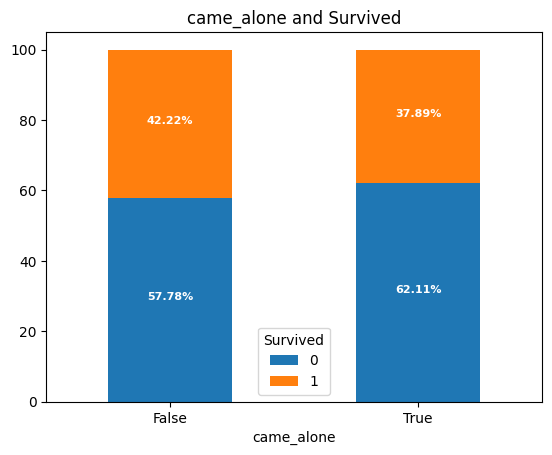

In [215]:
show_stacked_bar_chart(df_passengers,["came_alone","Survived"])

It is observed that the proportion of people who survived and were alone is higher than the proportion of those who survived and were accompanied.

## Classification model

### Selection of input variables for the model

Because age does not have a relationship to our response variable, we do not consider it as of now.

We eliminate the name because it does not make sense that the name has an influence on the response variable.

We eliminate the variables SibSp and Parch, since there is a variable that better explains their influence.

In [216]:
df_passengers.drop(labels=["Age","Name","SibSp","Parch"],inplace=True,axis="columns")

In [217]:
df_passengers.head()

,Survived,Sex,Pclass,TitleAbreviation,came_alone
0,1,male,1,Mr,True
1,1,female,1,Miss,True
2,1,male,1,Mr,True
3,0,male,1,Mr,True
4,1,female,1,Mrs,False


### We converted the categorical data to numerical data

In [218]:
categorical_variables=["Sex", "TitleAbreviation"]

In [219]:

encoder = OrdinalEncoder()
df_passengers[categorical_variables] = encoder.fit_transform(df_passengers[categorical_variables]).astype(int)



In [220]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object)]

### Optimization of memory usage for training

In [221]:
df_passengers.info()

<class 'pandas.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Survived          800 non-null    int64
 1   Sex               800 non-null    int32
 2   Pclass            800 non-null    int64
 3   TitleAbreviation  800 non-null    int32
 4   came_alone        800 non-null    bool 
dtypes: bool(1), int32(2), int64(2)
memory usage: 19.7 KB


In [222]:
df_passengers.nunique()

Survived            2
Sex                 2
Pclass              3
TitleAbreviation    5
came_alone          2
dtype: int64

In [223]:
df_passengers["Survived"]=df_passengers["Survived"].apply(bool)

Gender and class of the passage can be converted to categorical type.

In [224]:
df_passengers["Sex"]=df_passengers["Sex"].astype("category")
df_passengers["Pclass"]=df_passengers["Pclass"].astype("category")
df_passengers["TitleAbreviation"]=df_passengers["TitleAbreviation"].astype("category")



In [225]:
df_passengers.info()

<class 'pandas.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          800 non-null    bool    
 1   Sex               800 non-null    category
 2   Pclass            800 non-null    category
 3   TitleAbreviation  800 non-null    category
 4   came_alone        800 non-null    bool    
dtypes: bool(2), category(3)
memory usage: 4.1 KB


### Selection of the best prediction model

In [226]:
model_metrics_list=[]

In [227]:
def get_metrics_from_model(name,model,X_test,y_test,X_train,y_train):
    cv_scores = cross_val_score(model, X_train, np.ravel(y_train), cv = 5)
    return dict(
            name=name
            ,accuracy=round(accuracy_score(y_test, model.predict(X_test)),2)
            ,precision=round(precision_score(y_test, model.predict(X_test)),2)
            ,recall=round(recall_score(y_test, model.predict(X_test)),2)
            ,f1_score=round(f1_score(y_test, model.predict(X_test)),2)
            ,cv_scores=cv_scores
            ,mean_cross_validation=round(np.mean(cv_scores),2)
            ,cross_validation_standard_dev=round(np.std(cv_scores),2)
        )
    
def store_evaluation_metrics(name,model,X_test,y_test,X_train,y_train):
    model_metrics_list.append(
        get_metrics_from_model(name,model,X_test,y_test,X_train,y_train)
        )

In [228]:
def show_rater_metrics(data):
    print('classifier accuracy : ',data["accuracy"])
    print('classifier precision : ',data["precision"])
    print('classifier recall : ',data["recall"])
    print('classifier f1_score : ',data["f1_score"])

In [229]:

def show_cross_validation_validation_metrics(data):
    cv_scores = data["cv_scores"]
    print(cv_scores)
    print( "Average accuracy {0: 0.2f}, standard deviation {1: 0.2f}".format(data["mean_cross_validation"], data["cross_validation_standard_dev"]) )        


In [230]:
def show_confusion_matrix(model,y_test,X_test):
    print('classifier confusion matrix : \n {0}'.format(confusion_matrix(y_test, model.predict(X_test))))

In [ ]:
y=df_passengers["Survived"]
X=df_passengers.drop(labels=["Survived"],axis="columns")

In [ ]:
X.head()

,Sex,Pclass,TitleAbreviation,came_alone
0,1,1,2,True
1,0,1,1,True
2,1,1,2,True
3,1,1,2,True
4,0,1,3,False


In [ ]:
y.head()

0     True
1     True
2     True
3    False
4     True
Name: Survived, dtype: bool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Sex,Pclass,TitleAbreviation,came_alone
404,1,2,2,True
522,1,3,2,True
749,0,3,3,True
426,0,2,3,False
41,1,1,2,True


### Decision trees

### Base Decision tree

In [ ]:
treev1 = DecisionTreeClassifier(criterion='entropy')
treev1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
store_evaluation_metrics("Base Tree",treev1,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(treev1,y_test,X_test)

classifier accuracy :  0.82
classifier precision :  0.85
classifier recall :  0.67
classifier f1_score :  0.75
[0.86607143 0.82142857 0.76785714 0.79464286 0.83035714]
Average accuracy  0.82, standard deviation  0.03
classifier confusion matrix : 
 [[136  11]
 [ 31  62]]


### Decision Tree with feature selection

In [ ]:

select_features = SelectPercentile(mutual_info_classif, percentile = 75)

X_new = select_features.fit_transform(X, y)

In [ ]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2
0,1.0,1.0,2.0
1,0.0,1.0,1.0
2,1.0,1.0,2.0
3,1.0,1.0,2.0
4,0.0,1.0,3.0


In [ ]:
def get_selected_features(X,X_new):
    selected_features = []
    X=X.astype(np.float64)
    for i in range(len(X_new.columns)):
        for j in range(len(X.columns)):
            if(X_new.iloc[:,i].equals(X.iloc[:,j])):
                selected_features.append(X.columns[j])
            
    return selected_features

In [ ]:
selected_features=get_selected_features(X,X_new)

In [ ]:
selected_features

['Sex', 'Pclass', 'TitleAbreviation']

In [ ]:
X_train, X_test=X_train[selected_features],X_test[selected_features]

In [ ]:
X_train.head()

,Sex,Pclass,TitleAbreviation
404,1,2,2
522,1,3,2
749,0,3,3
426,0,2,3
41,1,1,2


In [ ]:
X_test.head()

,Sex,Pclass,TitleAbreviation
696,1,3,2
667,1,3,2
63,1,2,2
533,1,3,2
66,1,2,2


In [ ]:
treev2 = DecisionTreeClassifier(criterion='entropy')
treev2.fit(X_train,y_train )

DecisionTreeClassifier(criterion='entropy')

In [ ]:
store_evaluation_metrics("Decision Tree with feature selection",treev2,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(treev2,y_test,X_test)

classifier accuracy :  0.81
classifier precision :  0.96
classifier recall :  0.53
classifier f1_score :  0.68
[0.80357143 0.77678571 0.77678571 0.78571429 0.8125    ]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[145   2]
 [ 44  49]]


### Hyperparameter setting

In [ ]:
def grid_search(params, model=DecisionTreeClassifier(random_state=0)):

    grid_reg = GridSearchCV(model, params, n_jobs=-1)
    
    grid_reg.fit(X_train, y_train)

    best_params = grid_reg.best_params_
    
    print("The best params:", best_params)
    
    best_score = grid_reg.best_score_

    print("Best score: {0:.3f}".format(best_score))

### Decision Tree modifying the max_depth

In [ ]:
grid_search(params={'max_depth':[2,3,4,6,8,10,20]})

The best params: {'max_depth': 4}
Best score: 0.791


In [ ]:
treev3 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
treev3.fit(X_train,y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
store_evaluation_metrics("Decision Tree max depth=4",treev3,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(treev3,y_test,X_test)

classifier accuracy :  0.81
classifier precision :  0.96
classifier recall :  0.53
classifier f1_score :  0.68
[0.80357143 0.77678571 0.77678571 0.78571429 0.8125    ]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[145   2]
 [ 44  49]]


### Decision Tree modifying min_samples_leaf

In [ ]:
grid_search(params={'min_samples_leaf':[1,3,5,7,9]})

The best params: {'min_samples_leaf': 1}
Best score: 0.791


In [ ]:
treev4 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
treev4.fit(X_train,y_train )

DecisionTreeClassifier(criterion='entropy')

In [ ]:
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(treev4,y_test,X_test)

classifier accuracy :  0.81
classifier precision :  0.96
classifier recall :  0.53
classifier f1_score :  0.68
[0.80357143 0.77678571 0.77678571 0.78571429 0.8125    ]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[145   2]
 [ 44  49]]


There is no point in storing your metrics, since setting min_samples_leaf=1 is similar to using the tree with feature selection only.

### Tree modifying two parameters max_depth and min_samples_leaf

In [ ]:
grid_search(params={'max_depth':[5,6,7,8,9],'min_samples_leaf':[1,3,5,7,9]})

The best params: {'max_depth': 5, 'min_samples_leaf': 1}
Best score: 0.791


In [ ]:
treev5 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,max_depth=5)
treev5.fit(X_train,y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
store_evaluation_metrics("Decision Tree min samples leaf=1, max depth=5",treev5,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(treev5,y_test,X_test)

classifier accuracy :  0.81
classifier precision :  0.96
classifier recall :  0.53
classifier f1_score :  0.68
[0.80357143 0.77678571 0.77678571 0.78571429 0.8125    ]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[145   2]
 [ 44  49]]


### Random Forest 

In [ ]:
rf_v1 = RandomForestClassifier()
rf_v1

RandomForestClassifier()

In [ ]:
rf_v1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
store_evaluation_metrics("Random Forest n_estimators_default",rf_v1,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(rf_v1,y_test,X_test)

classifier accuracy :  0.81
classifier precision :  0.96
classifier recall :  0.53
classifier f1_score :  0.68
[0.80357143 0.77678571 0.77678571 0.78571429 0.8125    ]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[145   2]
 [ 44  49]]


### Random forest modifying n_estimators

In [ ]:
grid_search(params={'n_estimators':[5,10,20,40,60,70,80,90,100]},model=RandomForestClassifier(random_state=0))

The best params: {'n_estimators': 5}
Best score: 0.798


In [ ]:
rf_v2 = RandomForestClassifier(n_estimators=5)
rf_v2

RandomForestClassifier(n_estimators=5)

In [ ]:
rf_v2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
store_evaluation_metrics("Random forest best n_estimators=5",rf_v2,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(rf_v2,y_test,X_test)

classifier accuracy :  0.82
classifier precision :  0.83
classifier recall :  0.67
classifier f1_score :  0.74
[0.80357143 0.80357143 0.77678571 0.78571429 0.80357143]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[134  13]
 [ 31  62]]


### Random forest modifying max_depth and n_estimators

In [ ]:
grid_search(params={'max_depth':[5,6,7,8,9]
                    ,'n_estimators':[5,10,15,20,50,60,65,70,100]}
                    ,model=RandomForestClassifier(random_state=0))

The best params: {'max_depth': 5, 'n_estimators': 5}
Best score: 0.798


In [ ]:
rf_v3 = RandomForestClassifier(n_estimators=5,max_depth=5)
rf_v3

RandomForestClassifier(max_depth=5, n_estimators=5)

In [ ]:
rf_v3.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

In [ ]:
store_evaluation_metrics("Random Forest max_depth=5, n_estimators=5",rf_v3,X_test,y_test,X_train,y_train)
show_rater_metrics(model_metrics_list[-1])
show_cross_validation_validation_metrics(model_metrics_list[-1])
show_confusion_matrix(rf_v3,y_test,X_test)

classifier accuracy :  0.82
classifier precision :  0.83
classifier recall :  0.67
classifier f1_score :  0.74
[0.80357143 0.77678571 0.77678571 0.78571429 0.80357143]
Average accuracy  0.79, standard deviation  0.01
classifier confusion matrix : 
 [[134  13]
 [ 31  62]]


In [ ]:
model_metrics_df=pd.DataFrame(model_metrics_list).sort_values(by="cross_validation_standard_dev")
model_metrics_df

,name,accuracy,precision,recall,f1_score,cv_scores,mean_cross_validation,cross_validation_standard_dev
1,Decision Tree with feature selection,0.81,0.96,0.53,0.68,"[0.8035714285714286, 0.7767857142857143, 0.776...",0.79,0.01
2,Decision Tree max depth=4,0.81,0.96,0.53,0.68,"[0.8035714285714286, 0.7767857142857143, 0.776...",0.79,0.01
3,"Decision Tree min samples leaf=1, max depth=5",0.81,0.96,0.53,0.68,"[0.8035714285714286, 0.7767857142857143, 0.776...",0.79,0.01
4,Random Forest n_estimators_default,0.81,0.96,0.53,0.68,"[0.8035714285714286, 0.7767857142857143, 0.776...",0.79,0.01
5,Random forest best n_estimators=5,0.82,0.83,0.67,0.74,"[0.8035714285714286, 0.8035714285714286, 0.776...",0.79,0.01
6,"Random Forest max_depth=5, n_estimators=5",0.82,0.83,0.67,0.74,"[0.8035714285714286, 0.7767857142857143, 0.776...",0.79,0.01
0,Base Tree,0.82,0.85,0.67,0.75,"[0.8660714285714286, 0.8214285714285714, 0.767...",0.82,0.03


To adequately address the sensitivity of decision trees to overfitting and the potential replication of errors in random forests, a thorough cross-validation was performed on all the models considered. This process allowed us to assess the stability and consistency of the models, which is crucial to minimize the risk of overfitting.

Cross-validation focused on reducing the variability of the results. Lower variability during this process indicates that the model has a better generalization capability and is not overfitting the training data. In addition, special attention was paid to the evaluation metrics, specifically the F1 score, because of its ability to balance accuracy and recall.

In the context of our problem, it is critical to keep both recall and precision high. Higher recall ensures that as many survivors as possible are identified, minimizing the risk of leaving them unrescued. On the other hand, higher accuracy ensures that time and resources are not wasted on false alarms, thus improving rescue efficiency.

After evaluating multiple configurations, the best performing model was a random forest with a max_depth of 5 and n_estimators of 5 (ensembled decision trees). This model demonstrated not only the lowest variability during cross-validation, but also the highest F1 score, indicating an optimal balance between accuracy and recall.

classifier accuracy :  0.82

classifier precision :  0.83

classifier recall :  0.67

classifier f1_score :  0.74

[0.80357143 0.77678571 0.77678571 0.78571429 0.80357143]

Average accuracy  0.79, standard deviation  0.01

classifier confusion matrix : 

 [[134  13]

 [ 31  62]]

In [ ]:
model_metrics_df[model_metrics_df["name"]=="Random Forest max_depth=5, n_estimators=5"]

,name,accuracy,precision,recall,f1_score,cv_scores,mean_cross_validation,cross_validation_standard_dev
6,"Random Forest max_depth=5, n_estimators=5",0.82,0.83,0.67,0.74,"[0.8035714285714286, 0.7767857142857143, 0.776...",0.79,0.01


# Creative Commons License

This project is licensed under a [Creative Commons Attribution-NonCommercial 4.0 International](https://creativecommons.org/licenses/by-nc/4.0/) license.

![CC BY-NC 4.0](https://licensebuttons.net/l/by-nc/4.0/88x31.png)

## License Summary

### You are free to:
- **Share** — copy and redistribute the material in any medium or format.
- **Adapt** — remix, transform, and build upon the material.

Under the following terms:
### Conditions:
- **Attribution** — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.

- **NonCommercial** — You may not use the material for commercial purposes.
